In [ ]:
!gdown https://drive.google.com/uc?id=1Qc66kVqetwJIK7cKXnXxbPJy6gnpRSRI
!unzip The_Data.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
trainpath = './seg_train/'
testpath = './seg_test/'
predpath = './seg_pred/'

In [ ]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2274 in folder sea
For training data , found 2404 in folder glacier
For training data , found 2512 in folder mountain
For training data , found 2271 in folder forest
For training data , found 2382 in folder street
For training data , found 2191 in folder buildings


In [ ]:
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 510 in folder sea
For testing data , found 553 in folder glacier
For testing data , found 525 in folder mountain
For testing data , found 474 in folder forest
For testing data , found 501 in folder street
For testing data , found 437 in folder buildings


In [ ]:
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


In [ ]:
code_to_num = {'buildings':0 ,'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
num_to_code = {0:'buildings' ,1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}

def get_code(n) : 
    if n in num_to_code:
        return num_to_code[n]    

def get_num(c):
    if c in code_to_num:
        return code_to_num[c] 

In [ ]:
s = 100
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(get_num(folder))

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(get_code(y_train[i]))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(get_num(folder))
        

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(get_code(y_test[i]))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))       

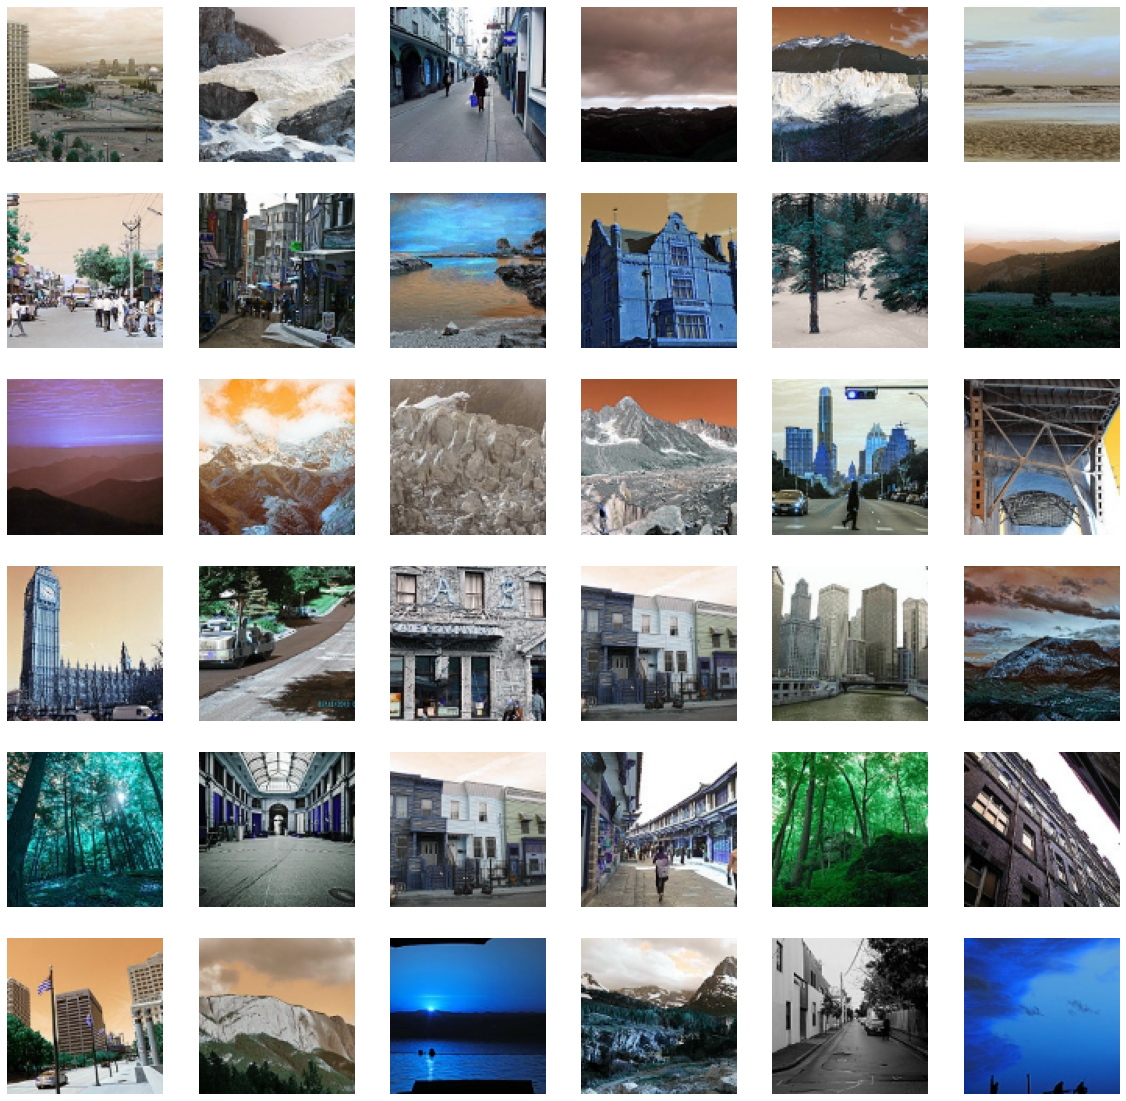

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

In [ ]:

KerasModel = keras.models.Sequential()
    
KerasModel.add(  keras.layers.Conv2D(64,(4,4),activation="relu",input_shape=(100,100,3)) )
KerasModel.add(  keras.layers.MaxPool2D(pool_size=(3,3)) )
KerasModel.add(  keras.layers.Dropout(0.2) )
KerasModel.add(  keras.layers.Conv2D(128,(4,4),activation="relu") )
KerasModel.add(  keras.layers.MaxPool2D(pool_size=(3,3)) )
KerasModel.add(  keras.layers.Dropout(0.2) )
KerasModel.add(  keras.layers.Conv2D(128,(4,4),activation="relu") )
KerasModel.add(  keras.layers.MaxPool2D(pool_size=(2,2)) )
KerasModel.add(  keras.layers.Dropout(0.2) )
KerasModel.add(  keras.layers.Flatten()  )
KerasModel.add(  keras.layers.Dense(6,activation="sigmoid")  )
    



In [ ]:
KerasModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 97, 97, 64)        3136      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 128)       131200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None,

In [ ]:
ThisModel = KerasModel.fit(X_train,y_train,epochs=50)

Epoch 1/50
439/439 [==============================] - 51s 18ms/step - loss: 10.1284 - accuracy: 0.3855
Epoch 2/50
439/439 [==============================] - 8s 17ms/step - loss: 1.0650 - accuracy: 0.5804
Epoch 3/50
439/439 [==============================] - 8s 17ms/step - loss: 0.9797 - accuracy: 0.6192
Epoch 4/50
439/439 [==============================] - 8s 17ms/step - loss: 0.9405 - accuracy: 0.6333
Epoch 5/50
439/439 [==============================] - 8s 17ms/step - loss: 0.8766 - accuracy: 0.6695
Epoch 6/50
439/439 [==============================] - 8s 17ms/step - loss: 0.8365 - accuracy: 0.6892
Epoch 7/50
439/439 [==============================] - 8s 17ms/step - loss: 0.7846 - accuracy: 0.7156
Epoch 8/50
439/439 [==============================] - 8s 17ms/step - loss: 0.7592 - accuracy: 0.7171
Epoch 9/50
439/439 [==============================] - 8s 17ms/step - loss: 0.7353 - accuracy: 0.7267
Epoch 10/50
439/439 [==============================] - 8s 17ms/step - loss: 0.7327 - accu

In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

94/94 [==============================] - 1s 6ms/step - loss: 0.7354 - accuracy: 0.7670
Test Loss is 0.7354208827018738
Test Accuracy is 0.7670000195503235


In [ ]:
y_result = KerasModel.predict(X_pred_array)

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(get_code(np.argmax(y_result[i])))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
vgg16 = keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(100,100,3))
for layers in vgg16.layers :
  layers.trainable=False

flattened=keras.layers.Flatten()(vgg16.output)
output_layer=keras.layers.Dense(6,activation='sigmoid')(flattened)

vgg_model=keras.models.Model(inputs=vgg16.input,outputs=output_layer)
vgg_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
______________________________________________________________

In [ ]:
vgg_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
Training_vgg = vgg_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
439/439 [==============================] - 39s 18ms/step - loss: 3.1675 - accuracy: 0.7894
Epoch 2/10
439/439 [==============================] - 8s 17ms/step - loss: 1.0958 - accuracy: 0.9049
Epoch 3/10
439/439 [==============================] - 8s 17ms/step - loss: 0.7827 - accuracy: 0.9180
Epoch 4/10
439/439 [==============================] - 7s 17ms/step - loss: 0.5946 - accuracy: 0.9348
Epoch 5/10
439/439 [==============================] - 7s 17ms/step - loss: 0.4880 - accuracy: 0.9453
Epoch 6/10
439/439 [==============================] - 7s 17ms/step - loss: 0.5151 - accuracy: 0.9443
Epoch 7/10
439/439 [==============================] - 8s 17ms/step - loss: 0.3918 - accuracy: 0.9561
Epoch 8/10
439/439 [==============================] - 8s 17ms/step - loss: 0.3167 - accuracy: 0.9624
Epoch 9/10
439/439 [==============================] - 8s 17ms/step - loss: 0.3572 - accuracy: 0.9600
Epoch 10/10
439/439 [==============================] - 8s 17ms/step - loss: 0.3584 - accur

In [ ]:
ModelLoss, ModelAccuracy = vgg_model.evaluate(X_test, y_test)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

94/94 [==============================] - 2s 22ms/step - loss: 3.6903 - accuracy: 0.8757
Test Loss is 3.6902942657470703
Test Accuracy is 0.8756666779518127


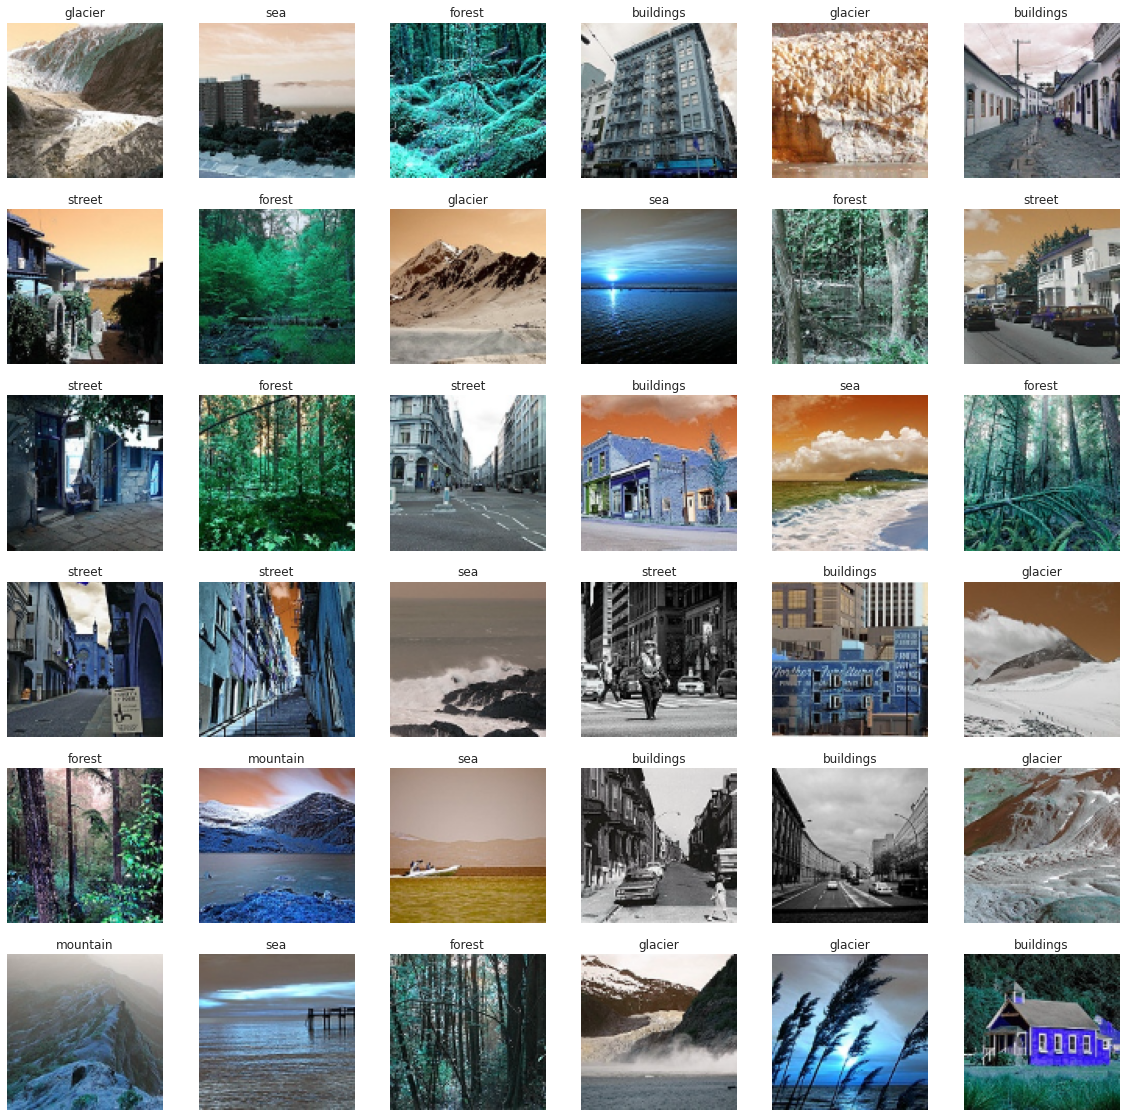

In [ ]:
vgg_pred=vgg_model.predict(X_pred_array)
plt.figure(figsize=(20,20))
for n,i in enumerate(list(np.random.randint(0,len(vgg_pred),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(X_pred_array[i])
  plt.axis("off")
  plt.title(get_code(np.argmax(vgg_pred[i])))